In [72]:
import os
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [82]:
import tarfile
from os import walk
f = []
mypath = "D:/Learn/南国/aaa/"#含有压缩包的文件夹
for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(dirnames)

In [84]:
import os
for name in f:
    file = "D:/Learn/南国/development/" + name
    os.mkdir(file)#创建多个文件夹

In [76]:
from scipy.io import wavfile
import webrtcvad
import struct
from scipy.io.wavfile import write

In [83]:
f

['C0751',
 'C0752',
 'C0753',
 'C0754',
 'C0755',
 'C0756',
 'C0757',
 'C0758',
 'C0759',
 'C0760',
 'C0761',
 'C0762',
 'C0763',
 'C0764',
 'C0765',
 'C0766',
 'C0767',
 'C0768',
 'C0769',
 'C0770',
 'C0771',
 'C0772',
 'C0773',
 'C0774',
 'C0775',
 'C0776',
 'C0777',
 'C0778',
 'C0779',
 'C0780',
 'C0782',
 'C0783',
 'C0784',
 'C0785',
 'C0786',
 'C0787',
 'C0788',
 'C0789',
 'C0790',
 'C0791',
 'C0792',
 'C0793',
 'C0794',
 'C0795',
 'C0796',
 'C0797',
 'C0798',
 'C0799',
 'C0800',
 'C0801',
 'C0802',
 'C0803',
 'C0804',
 'C0805',
 'C0806',
 'C0807',
 'C0808',
 'C0809',
 'C0810',
 'C0811',
 'C0812',
 'C0813',
 'C0814',
 'C0815',
 'C0816',
 'C0817',
 'C0818',
 'C0819',
 'C0820',
 'C0821',
 'C0822',
 'C0823',
 'C0824',
 'C0825',
 'C0826',
 'C0827',
 'C0828',
 'C0829',
 'C0830',
 'C0831',
 'C0832',
 'C0833',
 'C0834',
 'C0835',
 'C0836',
 'C0837',
 'C0838',
 'C0839',
 'C0840',
 'C0841',
 'C0842',
 'C0843',
 'C0844',
 'C0845',
 'C0846',
 'C0847',
 'C0848',
 'C0849',
 'C0850',
 'C0851',


In [85]:
for name in f:
    k = []
    mypath = "D:/Learn/南国/aaa/"+name+"/"
    for (dirpath, dirnames, filenames) in walk(mypath):
        k.extend(filenames)
        top_50 = k[:200]#k[52:61]
    for wav_file in top_50:
        train_audio_path = "D:/Learn/南国/aaa/"+name+"/"
        filename = wav_file
        sample_rate, samples = wavfile.read(os.path.join(train_audio_path, filename))
        vad = webrtcvad.Vad()
        vad.set_mode(3)

        raw_samples = struct.pack("%dh" % len(samples), *samples)

        window_duration = 0.03 # duration in seconds0.03
        samples_per_window = int(window_duration * sample_rate + 0.3)
        bytes_per_sample = 2

        segments = []
        try:       
            for start in np.arange(0, len(samples), samples_per_window):
                stop = min(start + samples_per_window, len(samples))
                is_speech = vad.is_speech(raw_samples[start * bytes_per_sample: stop * bytes_per_sample], 
                                      sample_rate = sample_rate)
                segments.append(dict(
                    start = start,
                    stop = stop,
                    is_speech = is_speech))
        except:
            try:
                speech_samples = np.concatenate([ samples[segment['start']:segment['stop']] for segment in segments if segment['is_speech']])
            except:
                continue
        try:
            speech_samples = np.concatenate([ samples[segment['start']:segment['stop']] for segment in segments if segment['is_speech']])
            
        except:
            continue
        new_path = "D:/Learn/南国/development/" +name+ "/" + wav_file
        write(new_path, sample_rate, speech_samples)   
#             new_path = "D:/Learn/南国/development/" +name+ "/" + wav_file
#             write(new_path, sample_rate, speech_samples)

In [37]:
k = []
mypath = "D:/Learn/南国/开发集/data/"
for (dirpath, dirnames, filenames) in walk(mypath):
        k.extend(filenames)
k

['006666c258d6e1cc6e04bdb2421b8727.wav',
 '00da2c73049ab43f22491d39a8e9f9ce.wav',
 '0191dac4a9da3e970a529079104af76b.wav',
 '01f8b6c8667237f163e801eeb8fe8f3d.wav',
 '02650e3473ec5a4d08c9445cebd66171.wav',
 '03500435d35e2ad6d140b427c37122c9.wav',
 '0366ce44c166905fac14a069a46283f3.wav',
 '03b88fdc682bf320a0114baf9b70ed27.wav',
 '03d8459d2dbb55a9209006ab4a6a46b4.wav',
 '04837add8841046277306738fce8bd3f.wav',
 '04882932d691f9985b4a4f707224b0fd.wav',
 '0508f38efd57f1ac3aae50ecc0399bd3.wav',
 '056ddde5ebbc85a83abee1a09babe0c2.wav',
 '05fa0760c616e1ab015f824343560441.wav',
 '061ab2d33fe82e07f8794f04e63c343d.wav',
 '06cdaa0f102435f1a72357ebb9ebd301.wav',
 '0704dd52509e9d793ba5bbeea859d555.wav',
 '07311d71d9260a52426cd512dcab4aab.wav',
 '0731bf0804c30ffb0cce9d02c703992b.wav',
 '07a0c3b4c9c2dc7777d21506bfbe3e51.wav',
 '07af8bb472e4f63c06691fb840231685.wav',
 '081694d0c6aa8d16eaed8e3205aec92c.wav',
 '086d6792e80c66fb9ff1ec67cec28116.wav',
 '0914ffb5dc55046e8505375269c1de93.wav',
 '092594379114d1

In [39]:
    for wav_file in k:
        train_audio_path = "D:/Learn/南国/开发集/data/"
        filename = wav_file
        sample_rate, samples = wavfile.read(os.path.join(train_audio_path, filename))
        vad = webrtcvad.Vad()
        vad.set_mode(3)

        raw_samples = struct.pack("%dh" % len(samples), *samples)

        window_duration = 0.03 # duration in seconds0.03
        samples_per_window = int(window_duration * sample_rate + 0.3)
        bytes_per_sample = 2

        segments = []
        try:       
            for start in np.arange(0, len(samples), samples_per_window):
                stop = min(start + samples_per_window, len(samples))
                is_speech = vad.is_speech(raw_samples[start * bytes_per_sample: stop * bytes_per_sample], 
                                      sample_rate = sample_rate)
                segments.append(dict(
                    start = start,
                    stop = stop,
                    is_speech = is_speech))
        except:
            try:
                speech_samples = np.concatenate([ samples[segment['start']:segment['stop']] for segment in segments if segment['is_speech']])
            except:
                speech_samples = samples
        new_path = "D:/Learn/aaa/" + filename
        write(new_path, sample_rate, speech_samples)           

In [58]:
segments = []
for start in np.arange(0, len(samples), samples_per_window):
                stop = min(start + samples_per_window, len(samples))
                is_speech = vad.is_speech(raw_samples[start * bytes_per_sample: stop * bytes_per_sample], 
                                      sample_rate = sample_rate)
                segments.append(dict(
                    start = start,
                    stop = stop,
                    is_speech = is_speech))

Error: Error while processing frame

In [44]:
sample_rate, samples = wavfile.read("D:/Learn/南国/aaa/C0055/IC0055W0010.wav")

In [45]:
segments = []

for start in np.arange(0, len(samples), samples_per_window):
    stop = min(start + samples_per_window, len(samples))
    
    is_speech = vad.is_speech(raw_samples[start * bytes_per_sample: stop * bytes_per_sample], 
                              sample_rate = sample_rate)

    segments.append(dict(
       start = start,
       stop = stop,
       is_speech = is_speech))

Error: Error while processing frame

In [46]:
window_duration = 0.03 # duration in seconds

samples_per_window = int(window_duration * sample_rate + 0.5)

bytes_per_sample = 2

In [41]:
raw_samples = struct.pack("%dh" % len(samples), *samples)

In [42]:
vad = webrtcvad.Vad()

# set aggressiveness from 0 to 3
vad.set_mode(3)

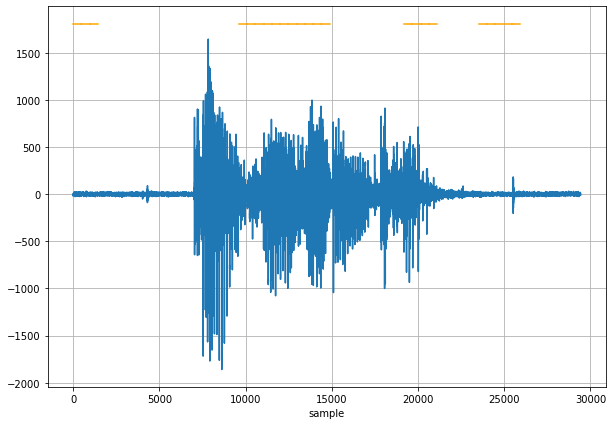

In [47]:
plt.figure(figsize = (10,7))
plt.plot(samples)

ymax = max(samples)

# plot segment identifed as speech
for segment in segments:
    if segment['is_speech']:
        plt.plot([ segment['start'], segment['stop'] - 1], [ymax * 1.1, ymax * 1.1], color = 'orange')

plt.xlabel('sample')
plt.grid()

In [48]:
speech_samples = np.concatenate([ samples[segment['start']:segment['stop']] for segment in segments if segment['is_speech']])
new_path = "D:/Learn/validation/C0055"+ "/" + wav_file
write(new_path, sample_rate, speech_samples)

FileNotFoundError: [Errno 2] No such file or directory: 'D:/Learn/validation/C0055/IC0055W0054.wav'

In [49]:
speech_samples = np.concatenate([ samples[segment['start']:segment['stop']] for segment in segments if segment['is_speech']])

import IPython.display as ipd
ipd.Audio(speech_samples, rate=sample_rate)